In [3]:
import models
import global_variables
import sys
import os
sys.path.append(os.path.abspath(global_variables.home_folder + 'GhostFreePro/data_preprocessing_pipeline'))
sys.path.append(os.path.abspath(global_variables.home_folder + 'GhostFreePro/GNN'))
from preprocessing_utils import aggregate_scores
import numpy as np
import pandas as pd
import tqdm
import torch
from torch_geometric.data import Data

In [4]:
ranks = torch.load(global_variables.home_folder + 'GhostFreePro/data_preprocessing_pipeline/artivir_data/positional_encoding/ranks_node2vec.pt')
ranks = torch.stack(ranks, dim = 1)

gene_names = np.load(global_variables.home_folder + 'GhostFreePro/data_preprocessing_pipeline/artivir_data/positional_encoding/gene_names_node2vec.npy', allow_pickle=True)
gene_names

array(['arf5', 'm6pr', 'fkbp4', ..., 'ccdc28a-as1', 'muc5ac', 'eif3l'],
      dtype=object)

In [5]:
len(gene_names)

16285

In [6]:
ranks.shape

torch.Size([16285, 8, 32])

In [7]:
ranks[:, 1].size()

torch.Size([16285, 32])

In [38]:
ranks_page_rank = torch.load(global_variables.home_folder + 'GhostFreePro/data_preprocessing_pipeline/artivir_data/positional_encoding/ranks.pt')
ranks_page_rank = torch.stack(ranks_page_rank, dim = 1)
ranks_page_rank.size()

torch.Size([18560, 96])

In [39]:
ranks[:,7].size()

torch.Size([16285, 32])

In [8]:
# read host factors from publications
host_factors = pd.ExcelFile("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/host_factors_from_publications.xlsx")
host_factors_dfs = {sheet_name: host_factors.parse(sheet_name) for sheet_name in host_factors.sheet_names}
potential_host_factors_list = host_factors_dfs["host_factors"]["Gene name"].str.lower().unique()

In [9]:
gene_list_antiviral = np.array(['gnrhr', 'oprd1', 'chrm3', 'hrh4', 'htr3b', 'itgav', 'kcnh2',
       'thra', 'oprk1', 'ntrk2', 'slc6a1', 'kit', 'htr6', 'scnn1g',
       'chrm1', 'scn11a', 'htr1e', 'f2', 'htr3c', 'htr1f', 'kcnh7',
       'esr2', 'gsto2', 'scnn1b', 'scnn1a', 'htr4', 'grin3a', 'nr1i3',
       'f2', 'gsto1', 'abl1', 'scnn1d', 'shbg', 'htr3d', 'chrm5', 'kcnq3',
       'noxo1', 'gstp1', 'pomc', 'ppara', 'gabrr2', 'oprm1', 'dhfr',
       'chrm2', 'htr3e', 'chrm4', 'scn5a', 'gabrr1', 'mttp', 'ntrk1',
       'itgb3', 'kcnh6', 'gabrr3'])

gene_list_proviral = np.array(['mmp2', 'mpo', 'ltf', 'neu2', 'akr1d1', 'ces1', 'rara', 'orm1',
       'prkcq', 'prkcg', 'bche', 'cacna1c', 'srd5a1', 'cacna1d',
       'cyp11b1', 'prkci', 'slc18a2', 'ache', 'prkcb', 'prkce', 'lpl',
       'tyms', 'enthd1', 'cacnb2', 'nos2', 'pde4b', 'rarb', 'cacna1h',
       'snca', 'nanos2', 'cyp1a2', 'ifnar2', 'pde4d', 'pde4c', 'cacna2d1',
       'cacna1g', 'rxrg', 'ces1', 'cacna1s', 'hsd11b1', 'ngf', 'xiap',
       'egfl7', 'ada', 'alox5', 'rxrb', 'pla2g2e', 'neu1', 'anxa1',
       'prkcz', 'nr0b1', 'pde4a', 'dsc1', 'prkcd', 'lcp1', 'cnga1',
       'cacna1i', 'rarg', 'scn10a', 'top2b', 'tnf', 'prkaca', 'top2a',
       'rxra', 'pde10a', 'srd5a2', 'cysltr1', 'kcnn3'])

In [10]:
indices_of_potential_host_factors = [index for index, gene_name in enumerate(gene_names) if gene_name in potential_host_factors_list]
indices_of_potential_not_host_factors = [index for index, gene_name in enumerate(gene_names) if gene_name not in potential_host_factors_list]
indices_of_antiviral = [index for index, gene_name in enumerate(gene_names) if gene_name in gene_list_antiviral]
indices_of_proviral = [index for index, gene_name in enumerate(gene_names) if gene_name in gene_list_proviral]

In [42]:
len(potential_host_factors_list)

5075

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50)
tsne.fit(ranks[:,7].numpy())

TSNE(perplexity=50)

In [13]:
from sklearn.manifold import TSNE
tsne_0 = TSNE(n_components=2, perplexity=50)
tsne_0.fit(ranks[:,0].numpy())

TSNE(perplexity=50)

In [14]:
from sklearn.manifold import TSNE
tsne_1 = TSNE(n_components=2, perplexity=50)
tsne_1.fit(ranks[:,1].numpy())

TSNE(perplexity=50)

In [20]:
tsne_2 = TSNE(n_components=2, perplexity=50)
tsne_2.fit(ranks[:,2].numpy())

tsne_3 = TSNE(n_components=2, perplexity=50)
tsne_3.fit(ranks[:,3].numpy())

tsne_4 = TSNE(n_components=2, perplexity=50)
tsne_4.fit(ranks[:,4].numpy())

tsne_5 = TSNE(n_components=2, perplexity=50)
tsne_5.fit(ranks[:,5].numpy())

tsne_6 = TSNE(n_components=2, perplexity=50)
tsne_6.fit(ranks[:,6].numpy())

TSNE(perplexity=50)

Text(0.5, 1.0, 't-SNE of ranks from Node2Vec, 0.7')

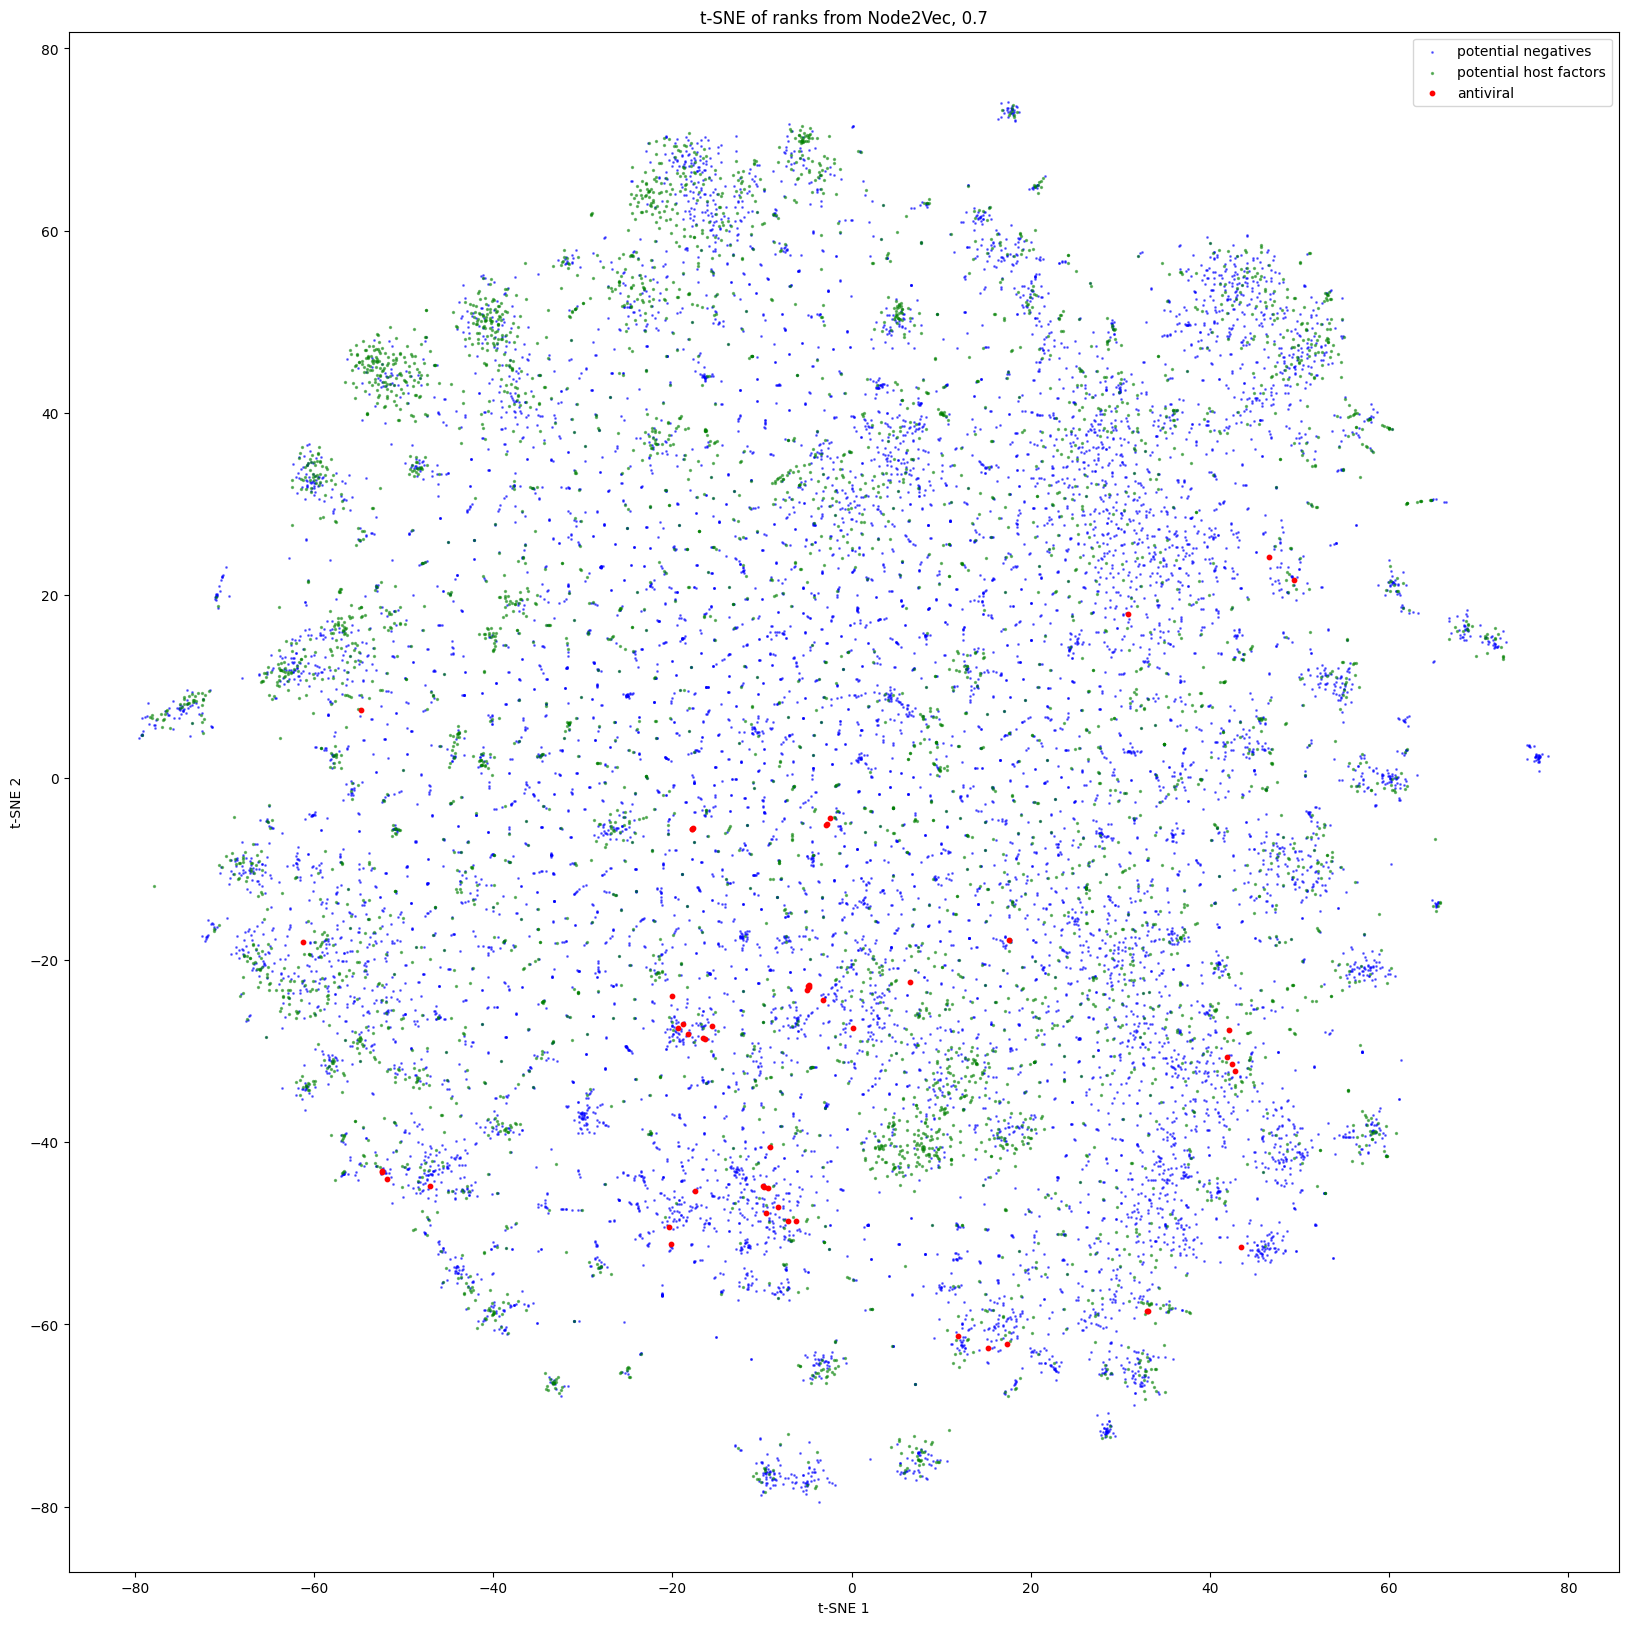

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
plt.scatter(tsne.embedding_[indices_of_potential_not_host_factors, 0], tsne.embedding_[indices_of_potential_not_host_factors, 1], c = "blue", label = "potential negatives", alpha = 0.5, s = 1)
plt.scatter(tsne.embedding_[indices_of_potential_host_factors, 0], tsne.embedding_[indices_of_potential_host_factors, 1], c = "green", label = "potential host factors", alpha=0.5, s = 2)
plt.scatter(tsne.embedding_[indices_of_antiviral, 0], tsne.embedding_[indices_of_antiviral, 1], c = "red", label = "antiviral", alpha=0.99, s = 10)
plt.legend()
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of ranks from Node2Vec, 0.7")

Text(0.5, 1.0, 't-SNE of ranks from Node2Vec only 0 PPI, 0.7')

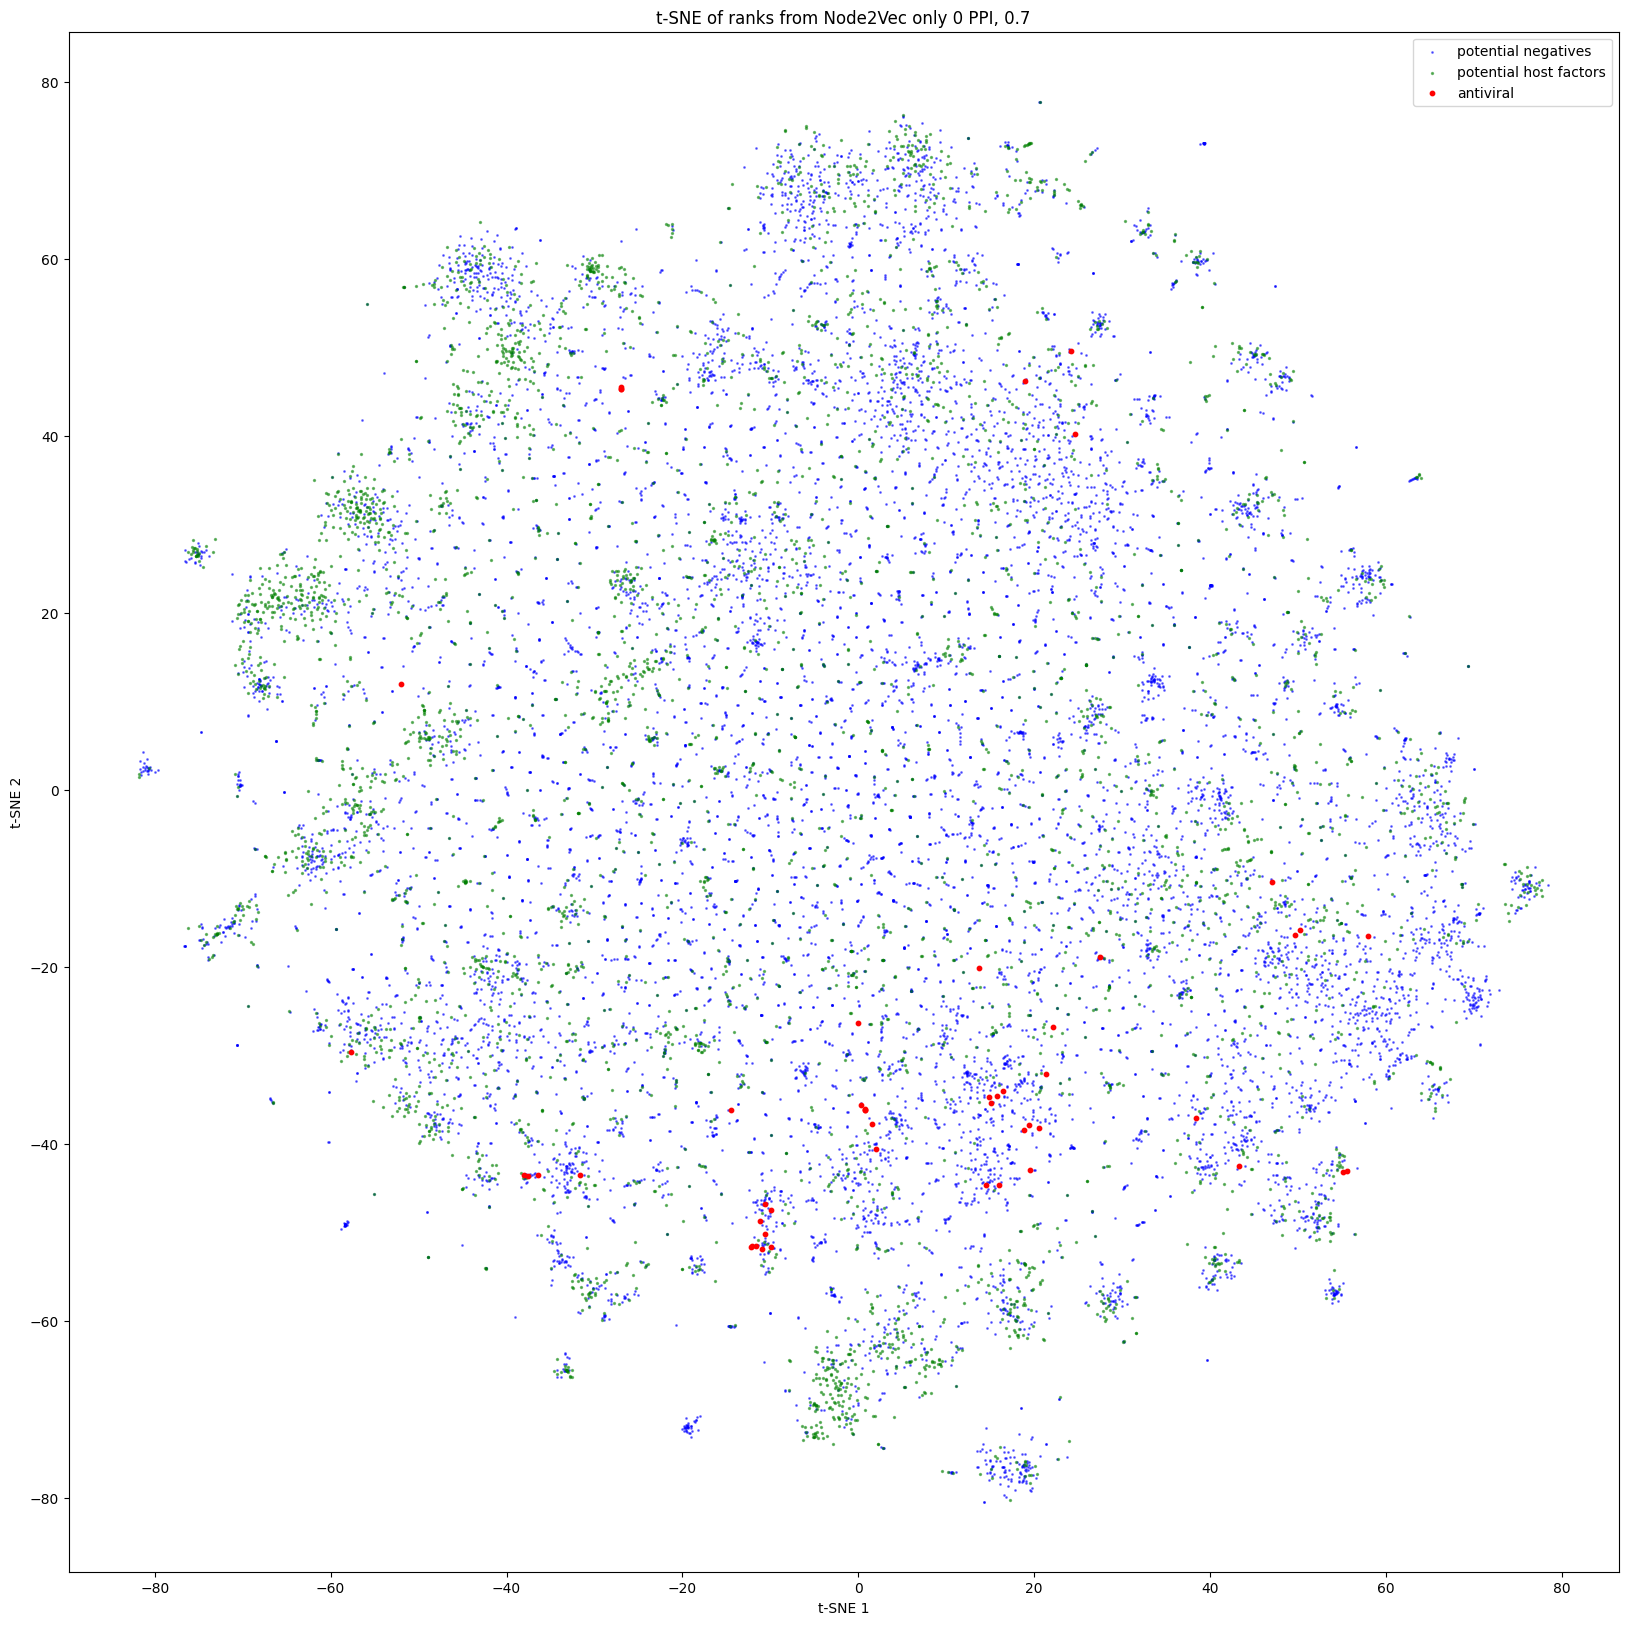

In [19]:
fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_0.embedding_[indices_of_potential_not_host_factors, 0], tsne_0.embedding_[indices_of_potential_not_host_factors, 1], c = "blue", label = "potential negatives", alpha = 0.5, s = 1)
plt.scatter(tsne_0.embedding_[indices_of_potential_host_factors, 0], tsne_0.embedding_[indices_of_potential_host_factors, 1], c = "green", label = "potential host factors", alpha=0.5, s = 2)
plt.scatter(tsne_0.embedding_[indices_of_antiviral, 0], tsne_0.embedding_[indices_of_antiviral, 1], c = "red", label = "antiviral", alpha=0.99, s = 10)
plt.legend()
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of ranks from Node2Vec only 0 PPI, 0.7")

Text(0.5, 1.0, 't-SNE of ranks from Node2Vec only 1 PPI, 0.7')

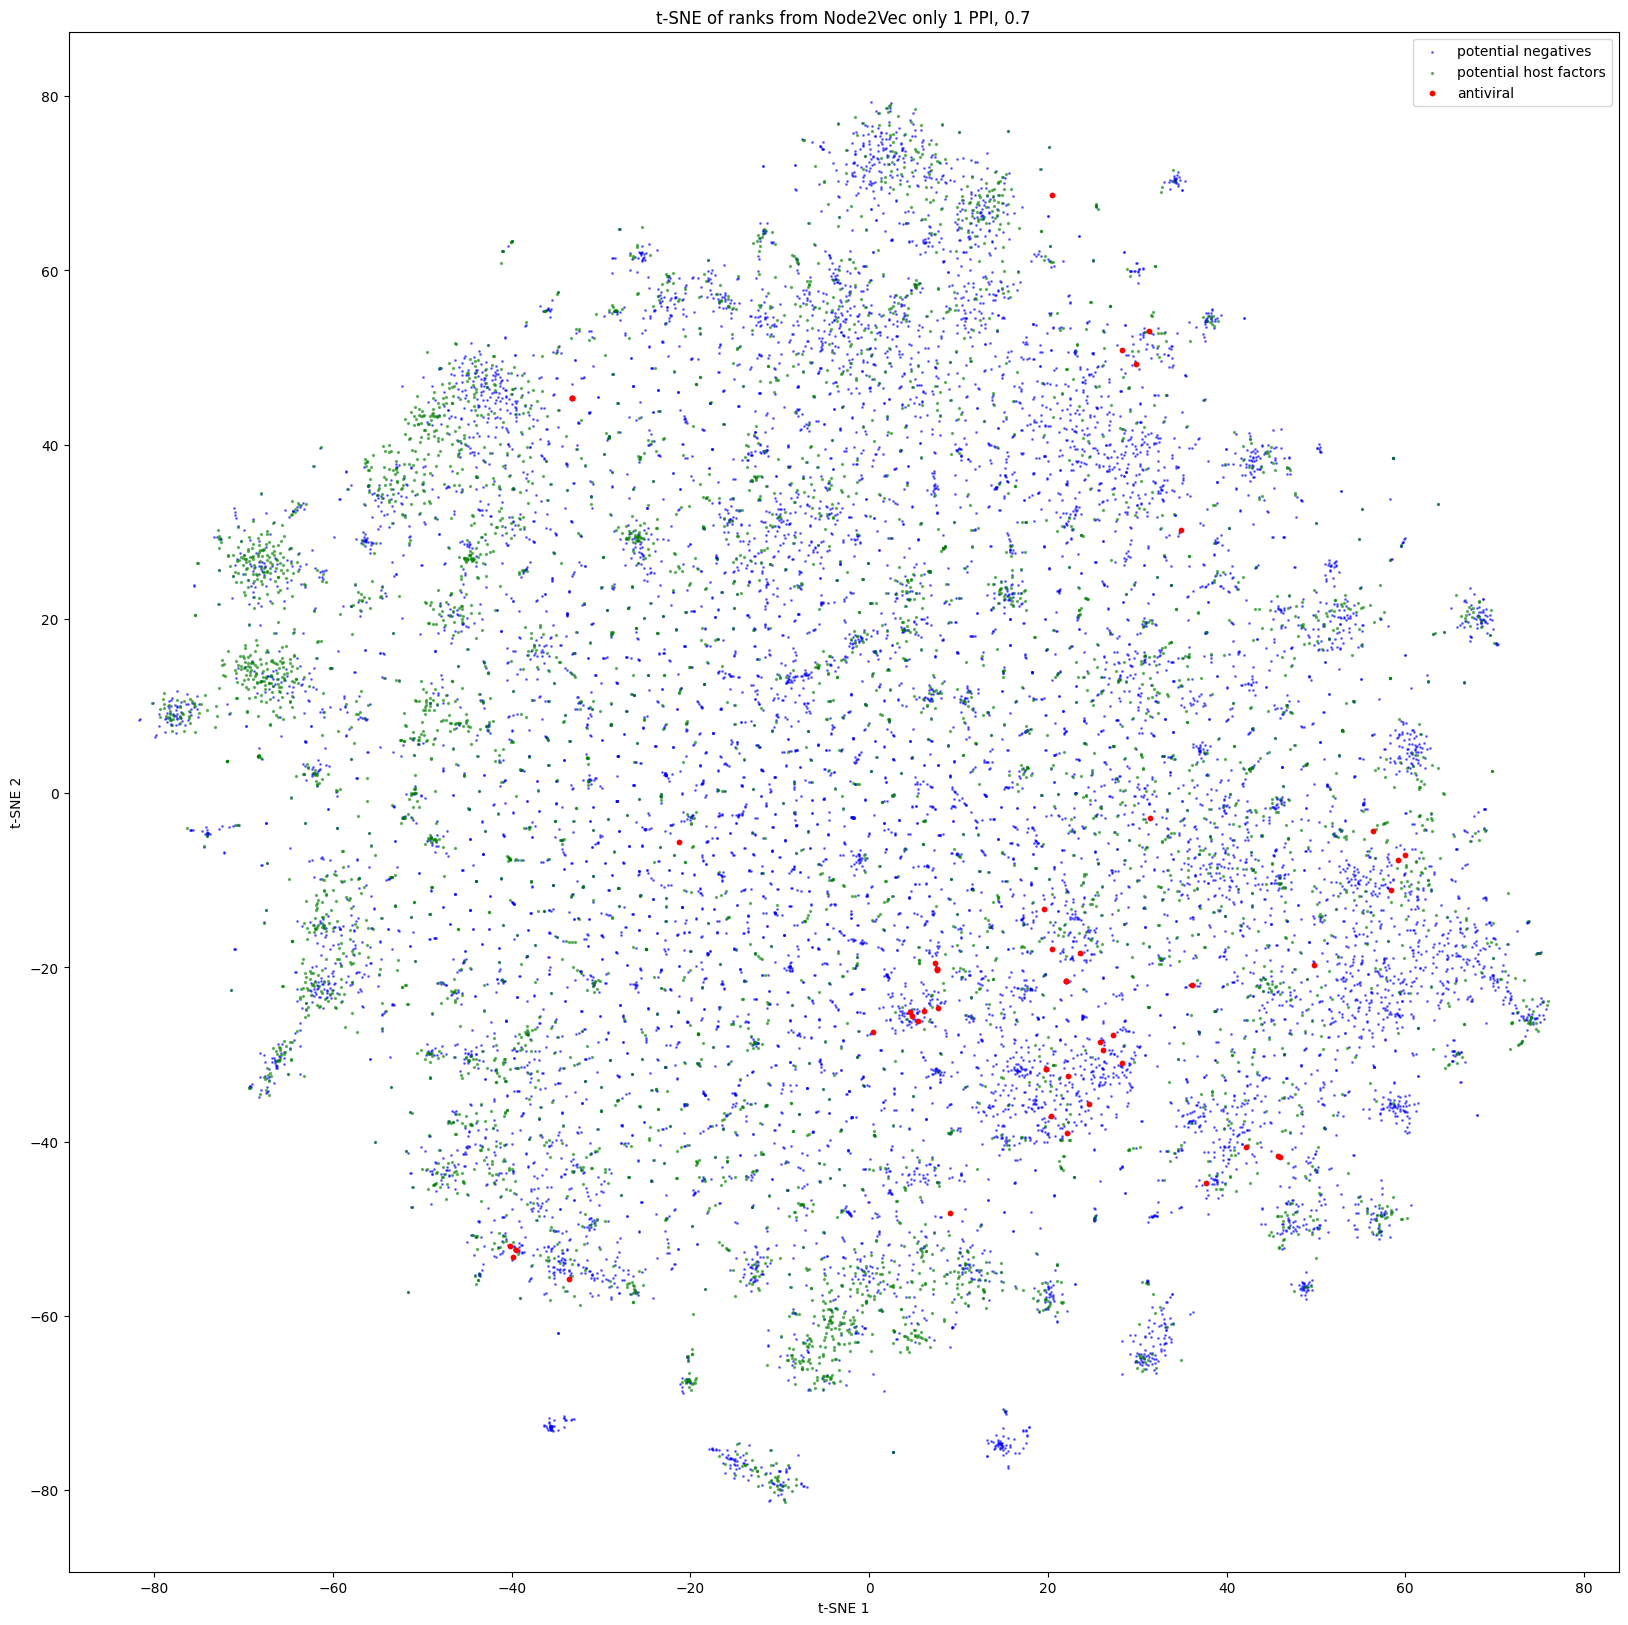

In [21]:
fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_1.embedding_[indices_of_potential_not_host_factors, 0], tsne_1.embedding_[indices_of_potential_not_host_factors, 1], c = "blue", label = "potential negatives", alpha = 0.5, s = 1)
plt.scatter(tsne_1.embedding_[indices_of_potential_host_factors, 0], tsne_1.embedding_[indices_of_potential_host_factors, 1], c = "green", label = "potential host factors", alpha=0.5, s = 2)
plt.scatter(tsne_1.embedding_[indices_of_antiviral, 0], tsne_1.embedding_[indices_of_antiviral, 1], c = "red", label = "antiviral", alpha=0.99, s = 10)
plt.legend()
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of ranks from Node2Vec only 1 PPI, 0.7")

Text(0.5, 1.0, 't-SNE of ranks from Node2Vec only 2 PPI, 0.7')

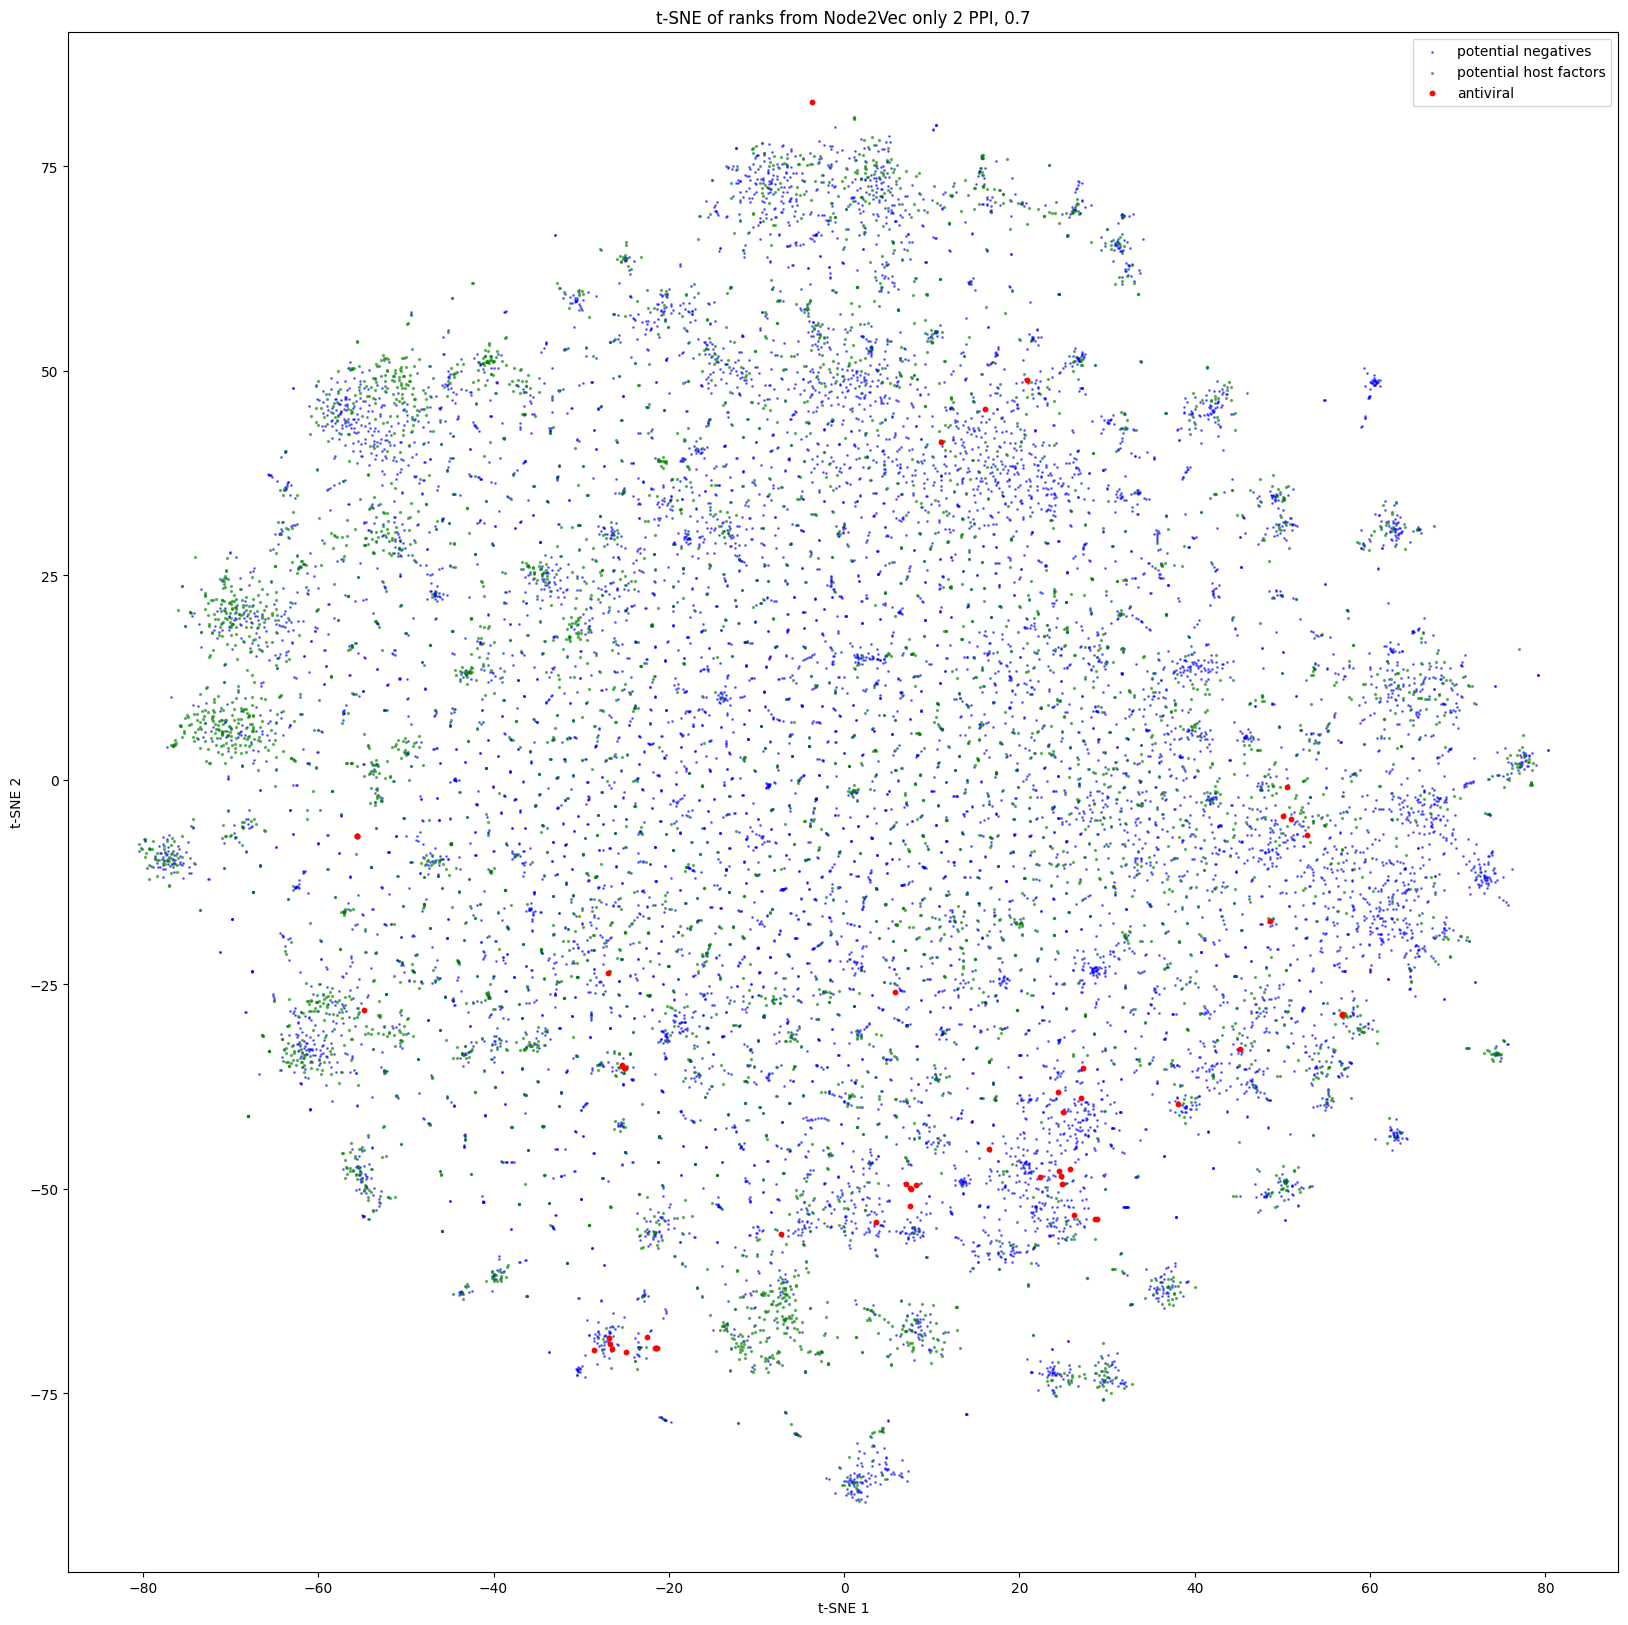

In [22]:
fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_2.embedding_[indices_of_potential_not_host_factors, 0], tsne_2.embedding_[indices_of_potential_not_host_factors, 1], c = "blue", label = "potential negatives", alpha = 0.5, s = 1)
plt.scatter(tsne_2.embedding_[indices_of_potential_host_factors, 0], tsne_2.embedding_[indices_of_potential_host_factors, 1], c = "green", label = "potential host factors", alpha=0.5, s = 2)
plt.scatter(tsne_2.embedding_[indices_of_antiviral, 0], tsne_2.embedding_[indices_of_antiviral, 1], c = "red", label = "antiviral", alpha=0.99, s = 10)
plt.legend()
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of ranks from Node2Vec only 2 PPI, 0.7")

Text(0.5, 1.0, 't-SNE of ranks from Node2Vec only 3 PPI, 0.7')

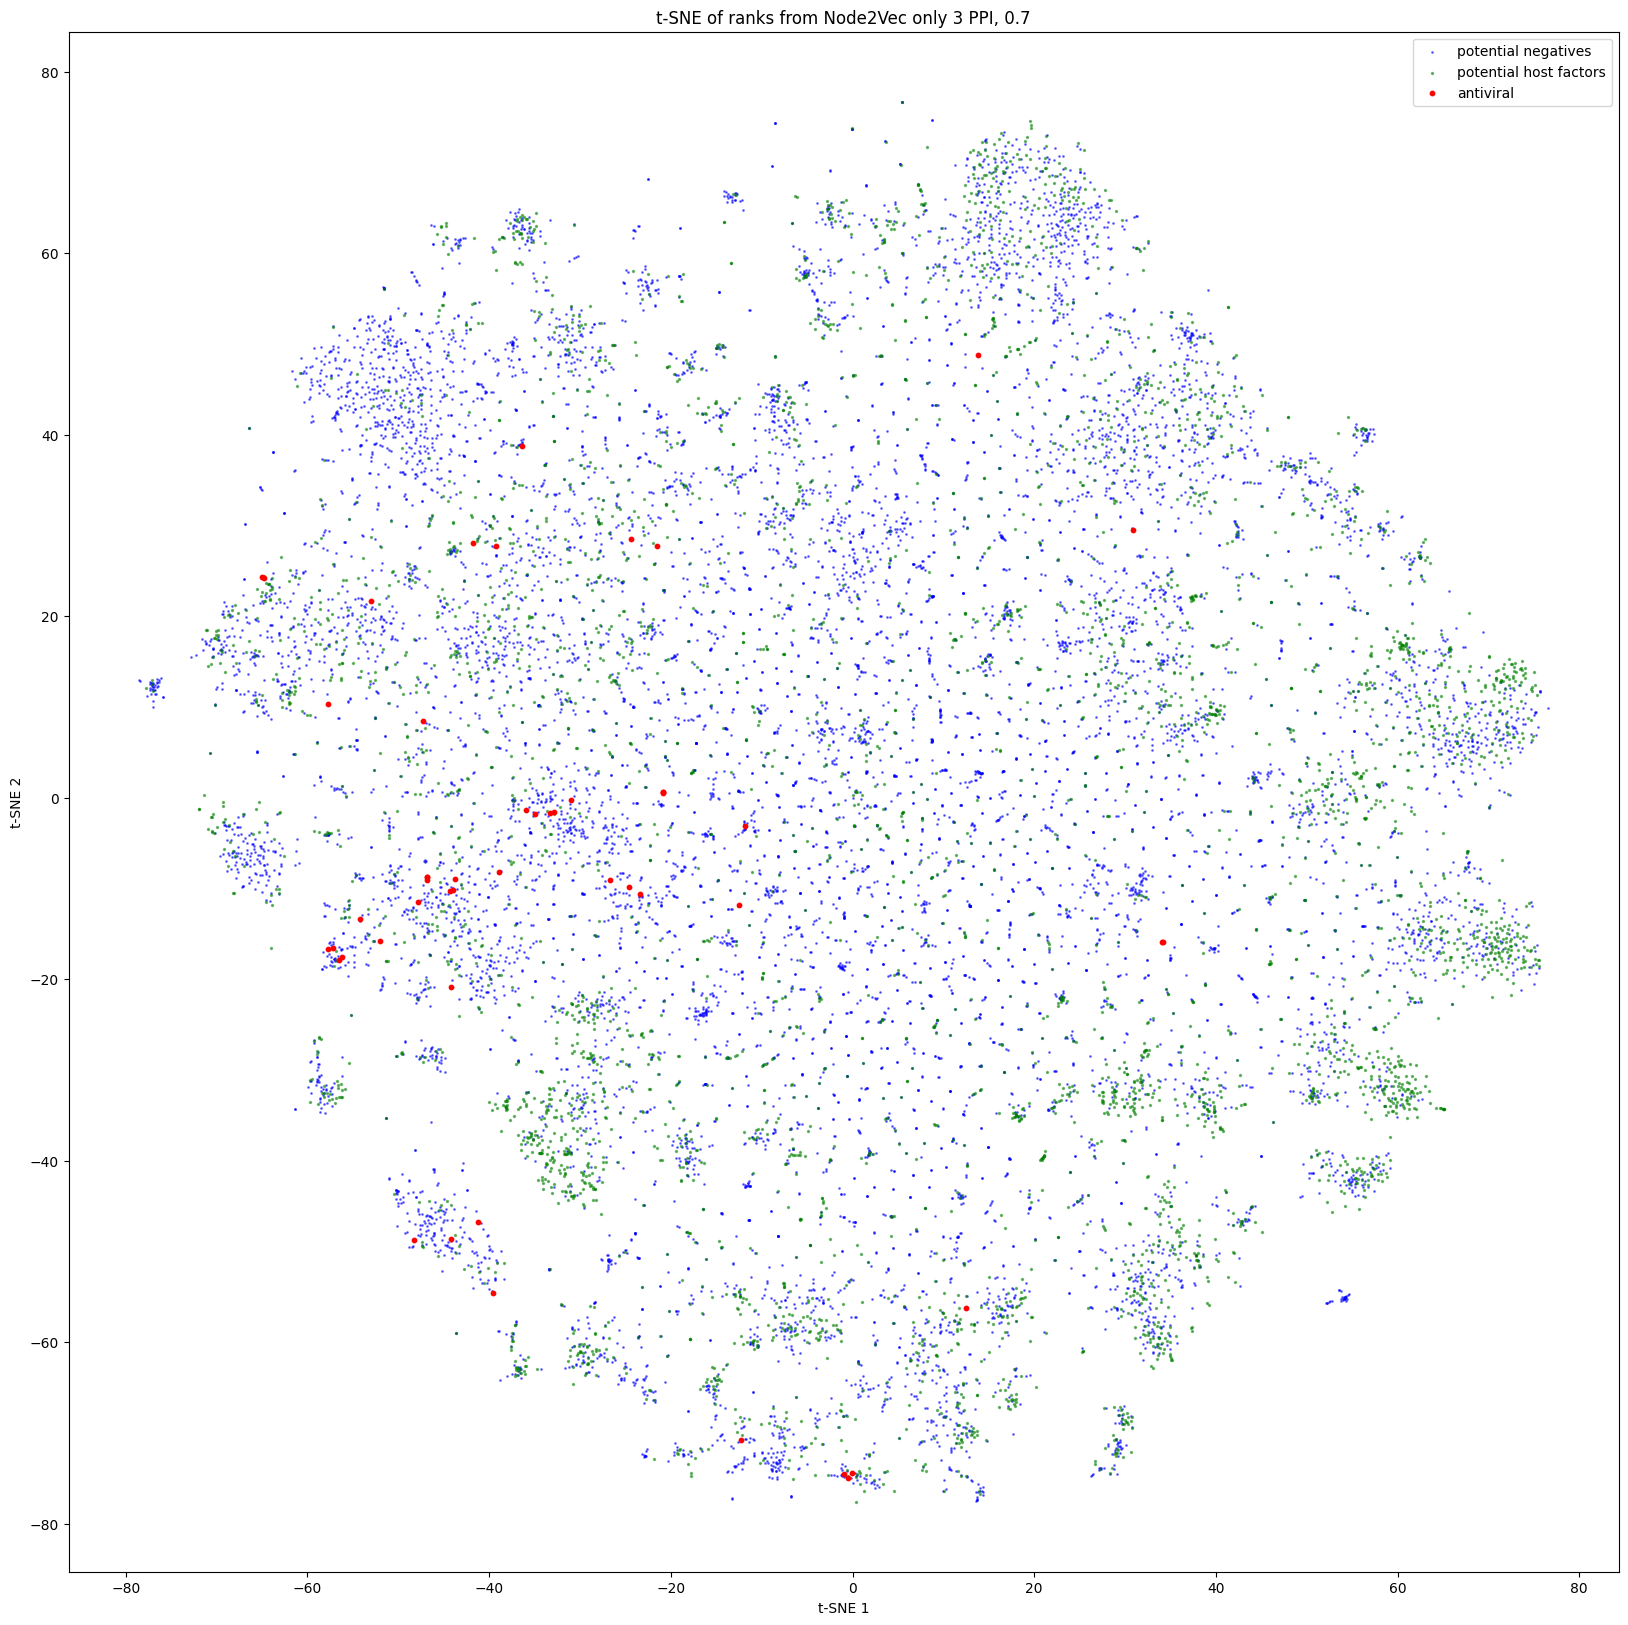

In [23]:
fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_3.embedding_[indices_of_potential_not_host_factors, 0], tsne_3.embedding_[indices_of_potential_not_host_factors, 1], c = "blue", label = "potential negatives", alpha = 0.5, s = 1)
plt.scatter(tsne_3.embedding_[indices_of_potential_host_factors, 0], tsne_3.embedding_[indices_of_potential_host_factors, 1], c = "green", label = "potential host factors", alpha=0.5, s = 2)
plt.scatter(tsne_3.embedding_[indices_of_antiviral, 0], tsne_3.embedding_[indices_of_antiviral, 1], c = "red", label = "antiviral", alpha=0.99, s = 10)
plt.legend()
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of ranks from Node2Vec only 3 PPI, 0.7")

Text(0.5, 1.0, 't-SNE of ranks from Node2Vec only 4 PPI, 0.7')

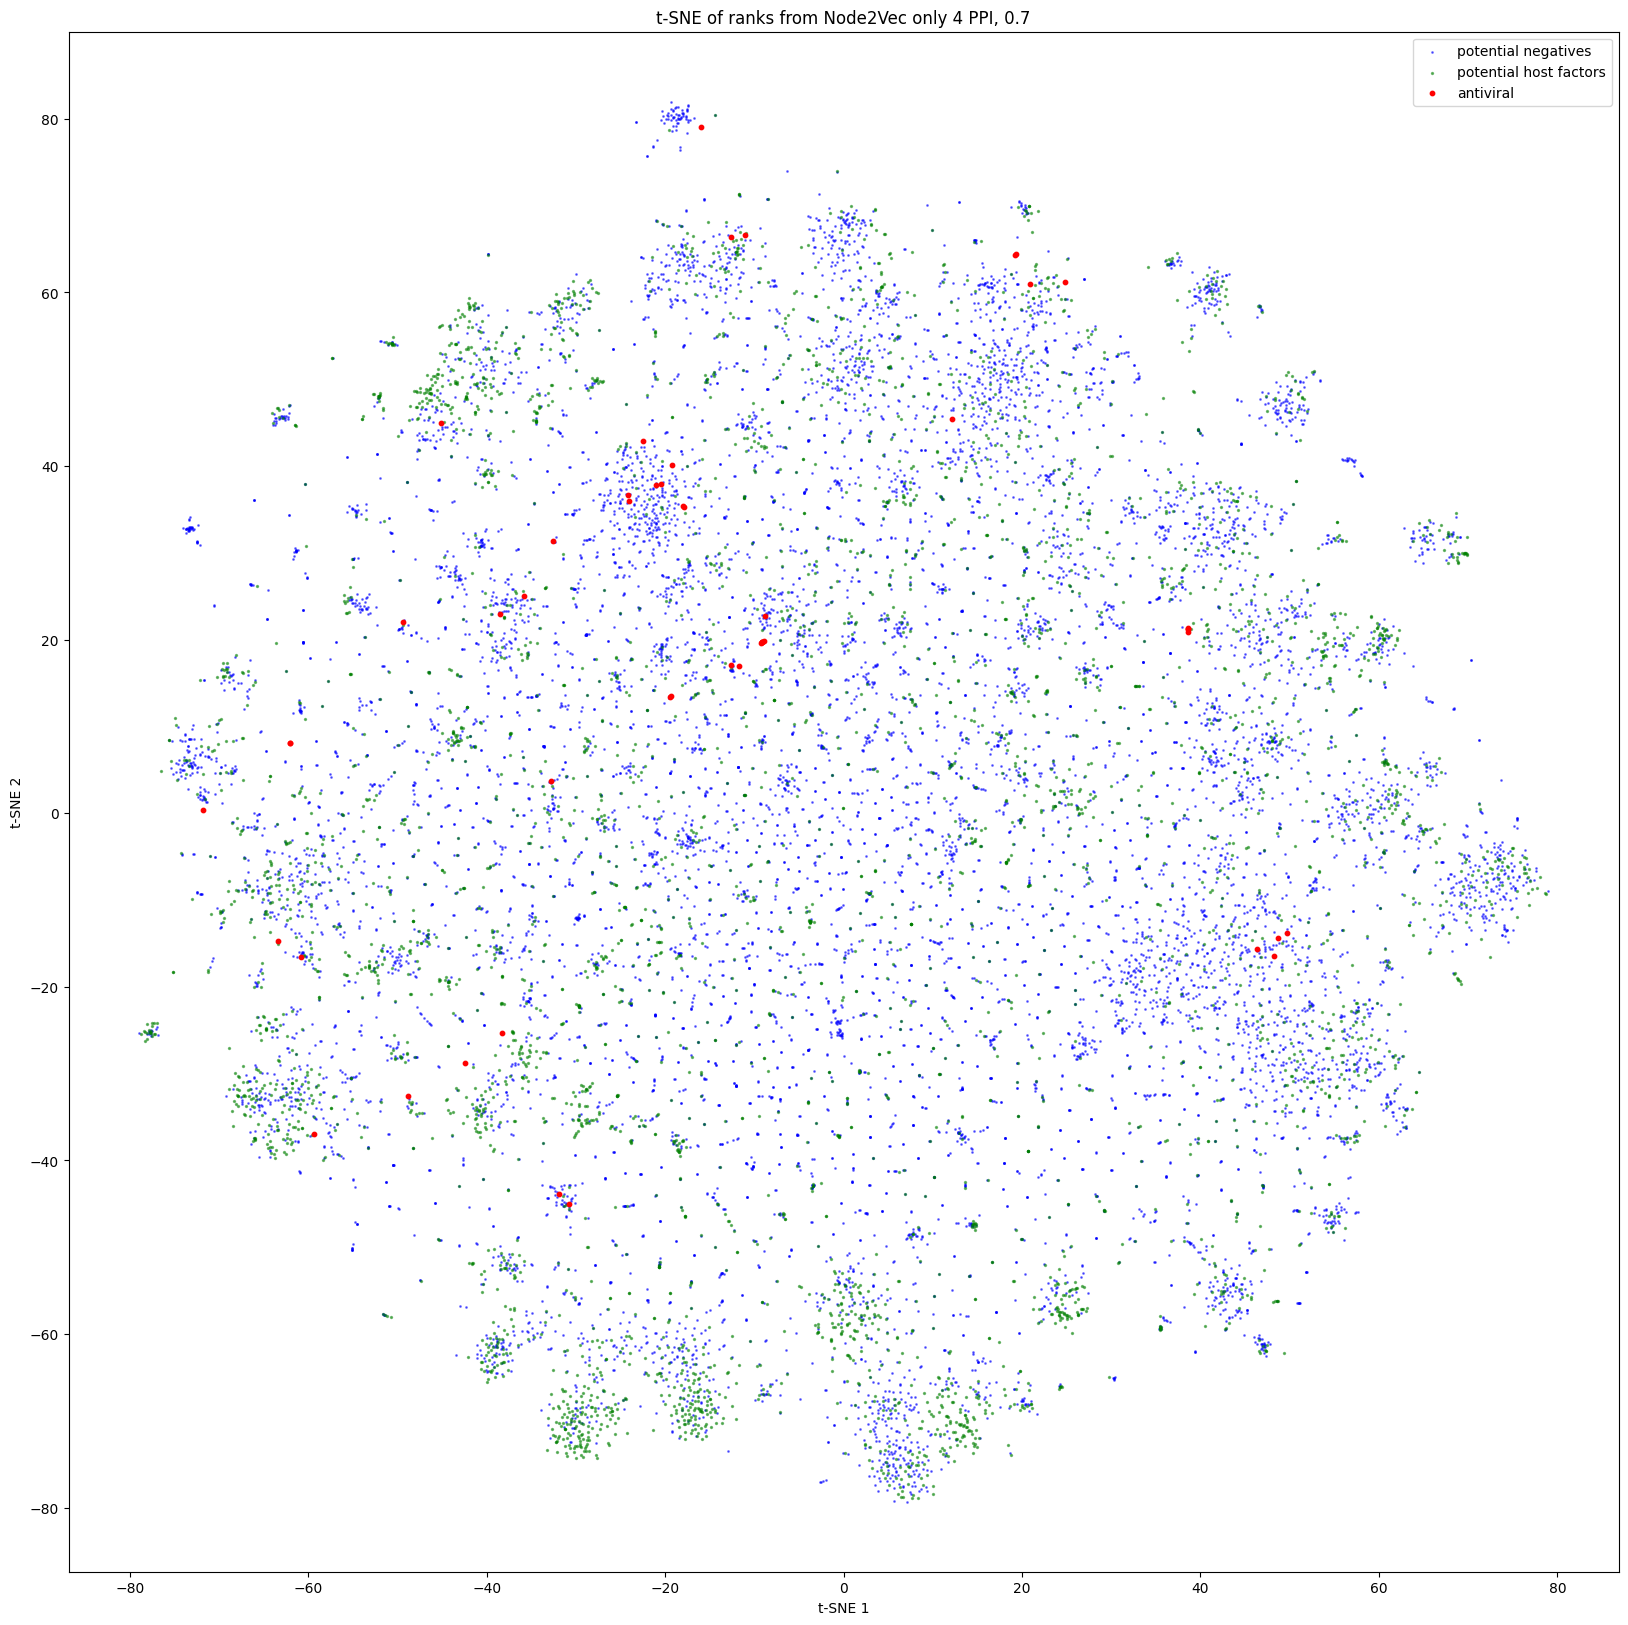

In [24]:
fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_4.embedding_[indices_of_potential_not_host_factors, 0], tsne_4.embedding_[indices_of_potential_not_host_factors, 1], c = "blue", label = "potential negatives", alpha = 0.5, s = 1)
plt.scatter(tsne_4.embedding_[indices_of_potential_host_factors, 0], tsne_4.embedding_[indices_of_potential_host_factors, 1], c = "green", label = "potential host factors", alpha=0.5, s = 2)
plt.scatter(tsne_4.embedding_[indices_of_antiviral, 0], tsne_4.embedding_[indices_of_antiviral, 1], c = "red", label = "antiviral", alpha=0.99, s = 10)
plt.legend()
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of ranks from Node2Vec only 4 PPI, 0.7")

Text(0.5, 1.0, 't-SNE of ranks from Node2Vec only 5 PPI, 0.7')

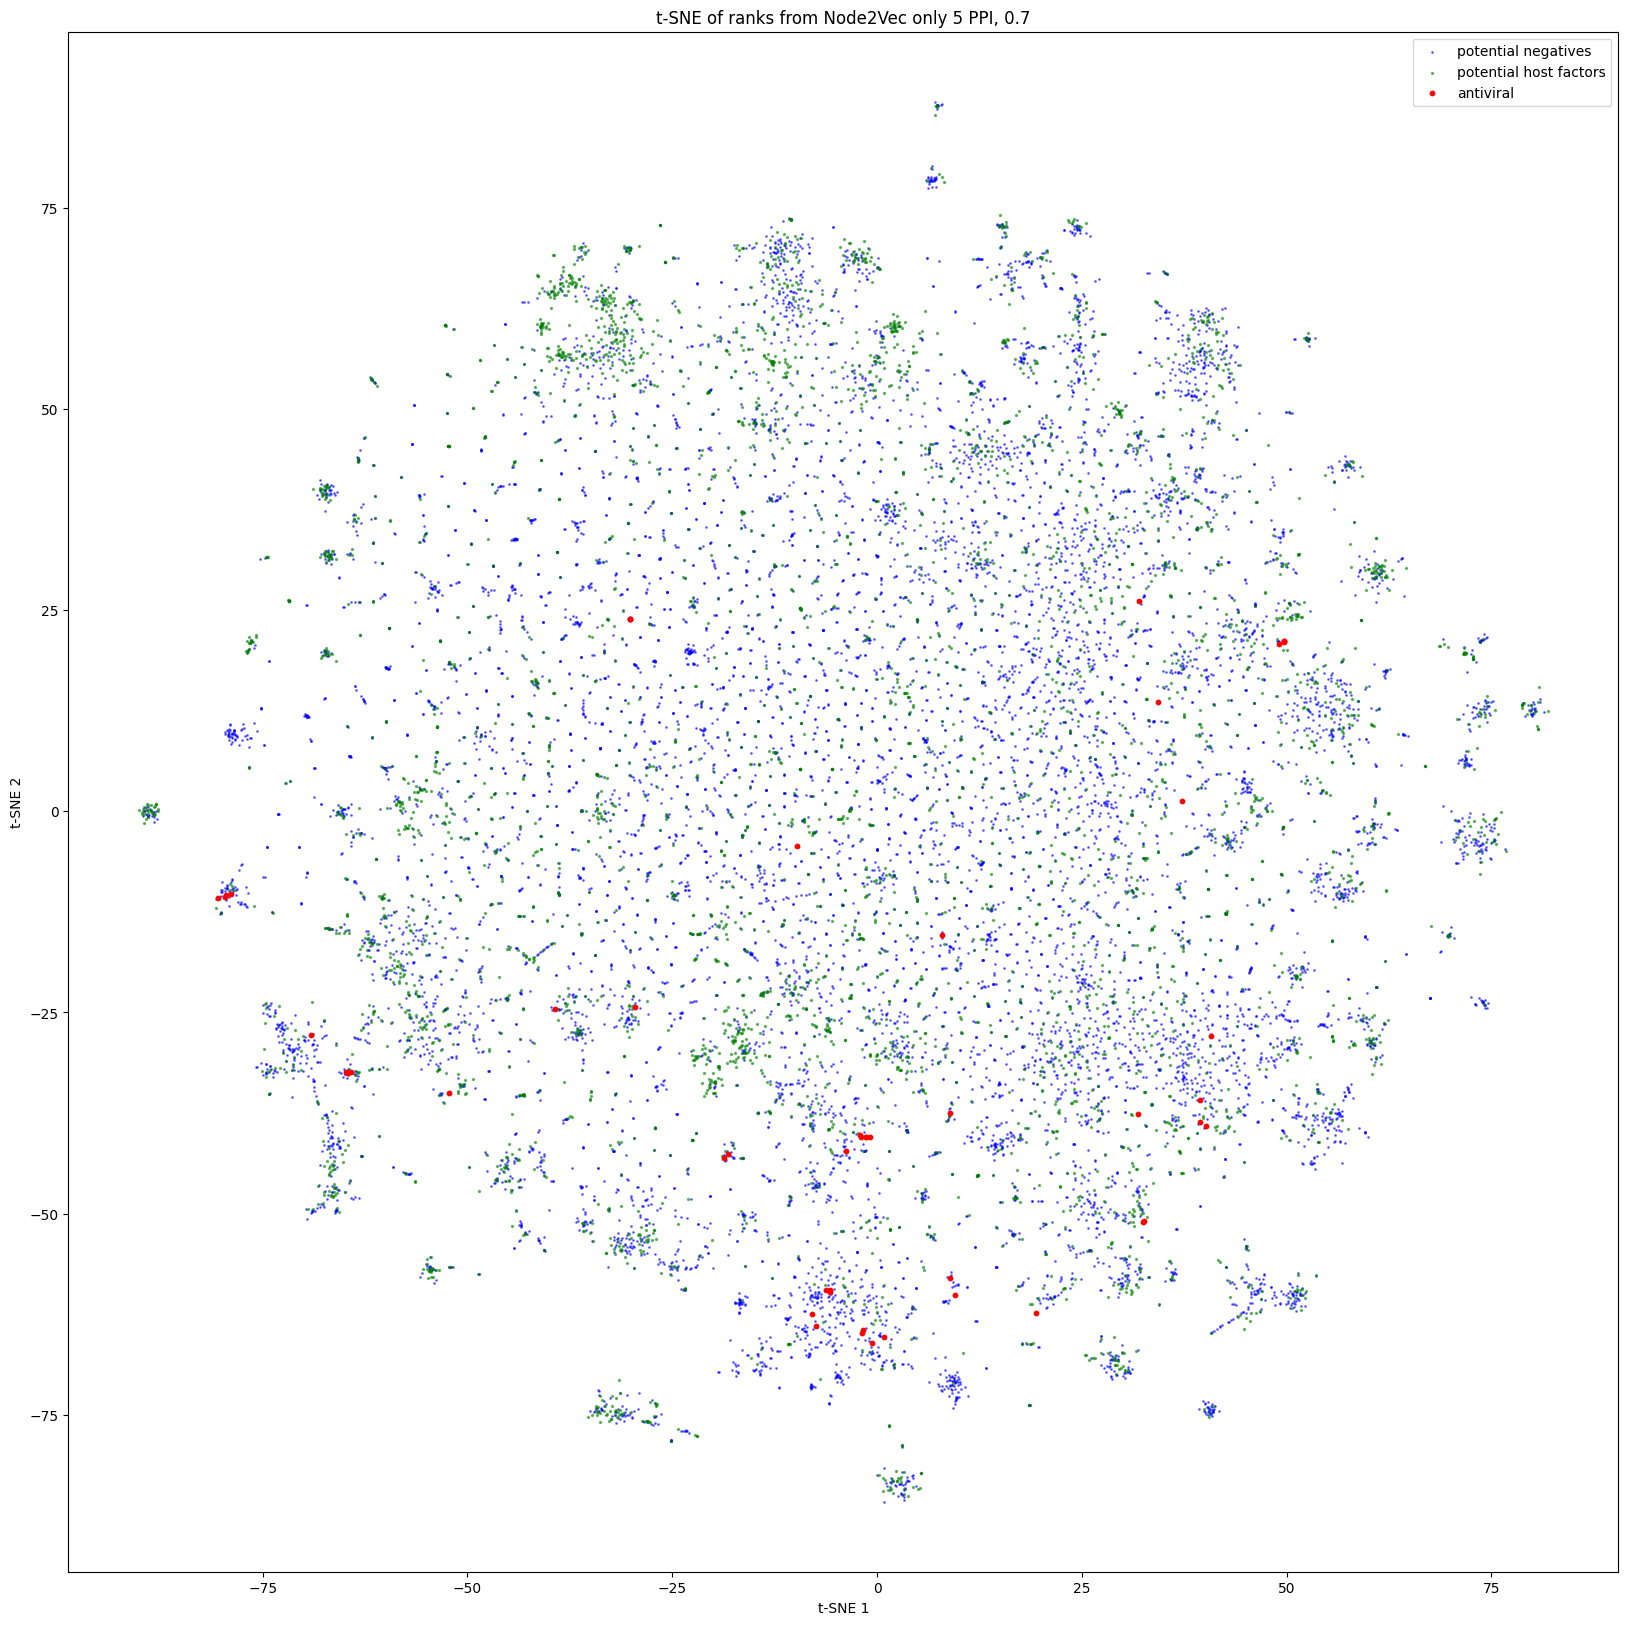

In [25]:
fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_5.embedding_[indices_of_potential_not_host_factors, 0], tsne_5.embedding_[indices_of_potential_not_host_factors, 1], c = "blue", label = "potential negatives", alpha = 0.5, s = 1)
plt.scatter(tsne_5.embedding_[indices_of_potential_host_factors, 0], tsne_5.embedding_[indices_of_potential_host_factors, 1], c = "green", label = "potential host factors", alpha=0.5, s = 2)
plt.scatter(tsne_5.embedding_[indices_of_antiviral, 0], tsne_5.embedding_[indices_of_antiviral, 1], c = "red", label = "antiviral", alpha=0.99, s = 10)
plt.legend()
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of ranks from Node2Vec only 5 PPI, 0.7")

Text(0.5, 1.0, 't-SNE of ranks from Node2Vec only 6 PPI, 0.7')

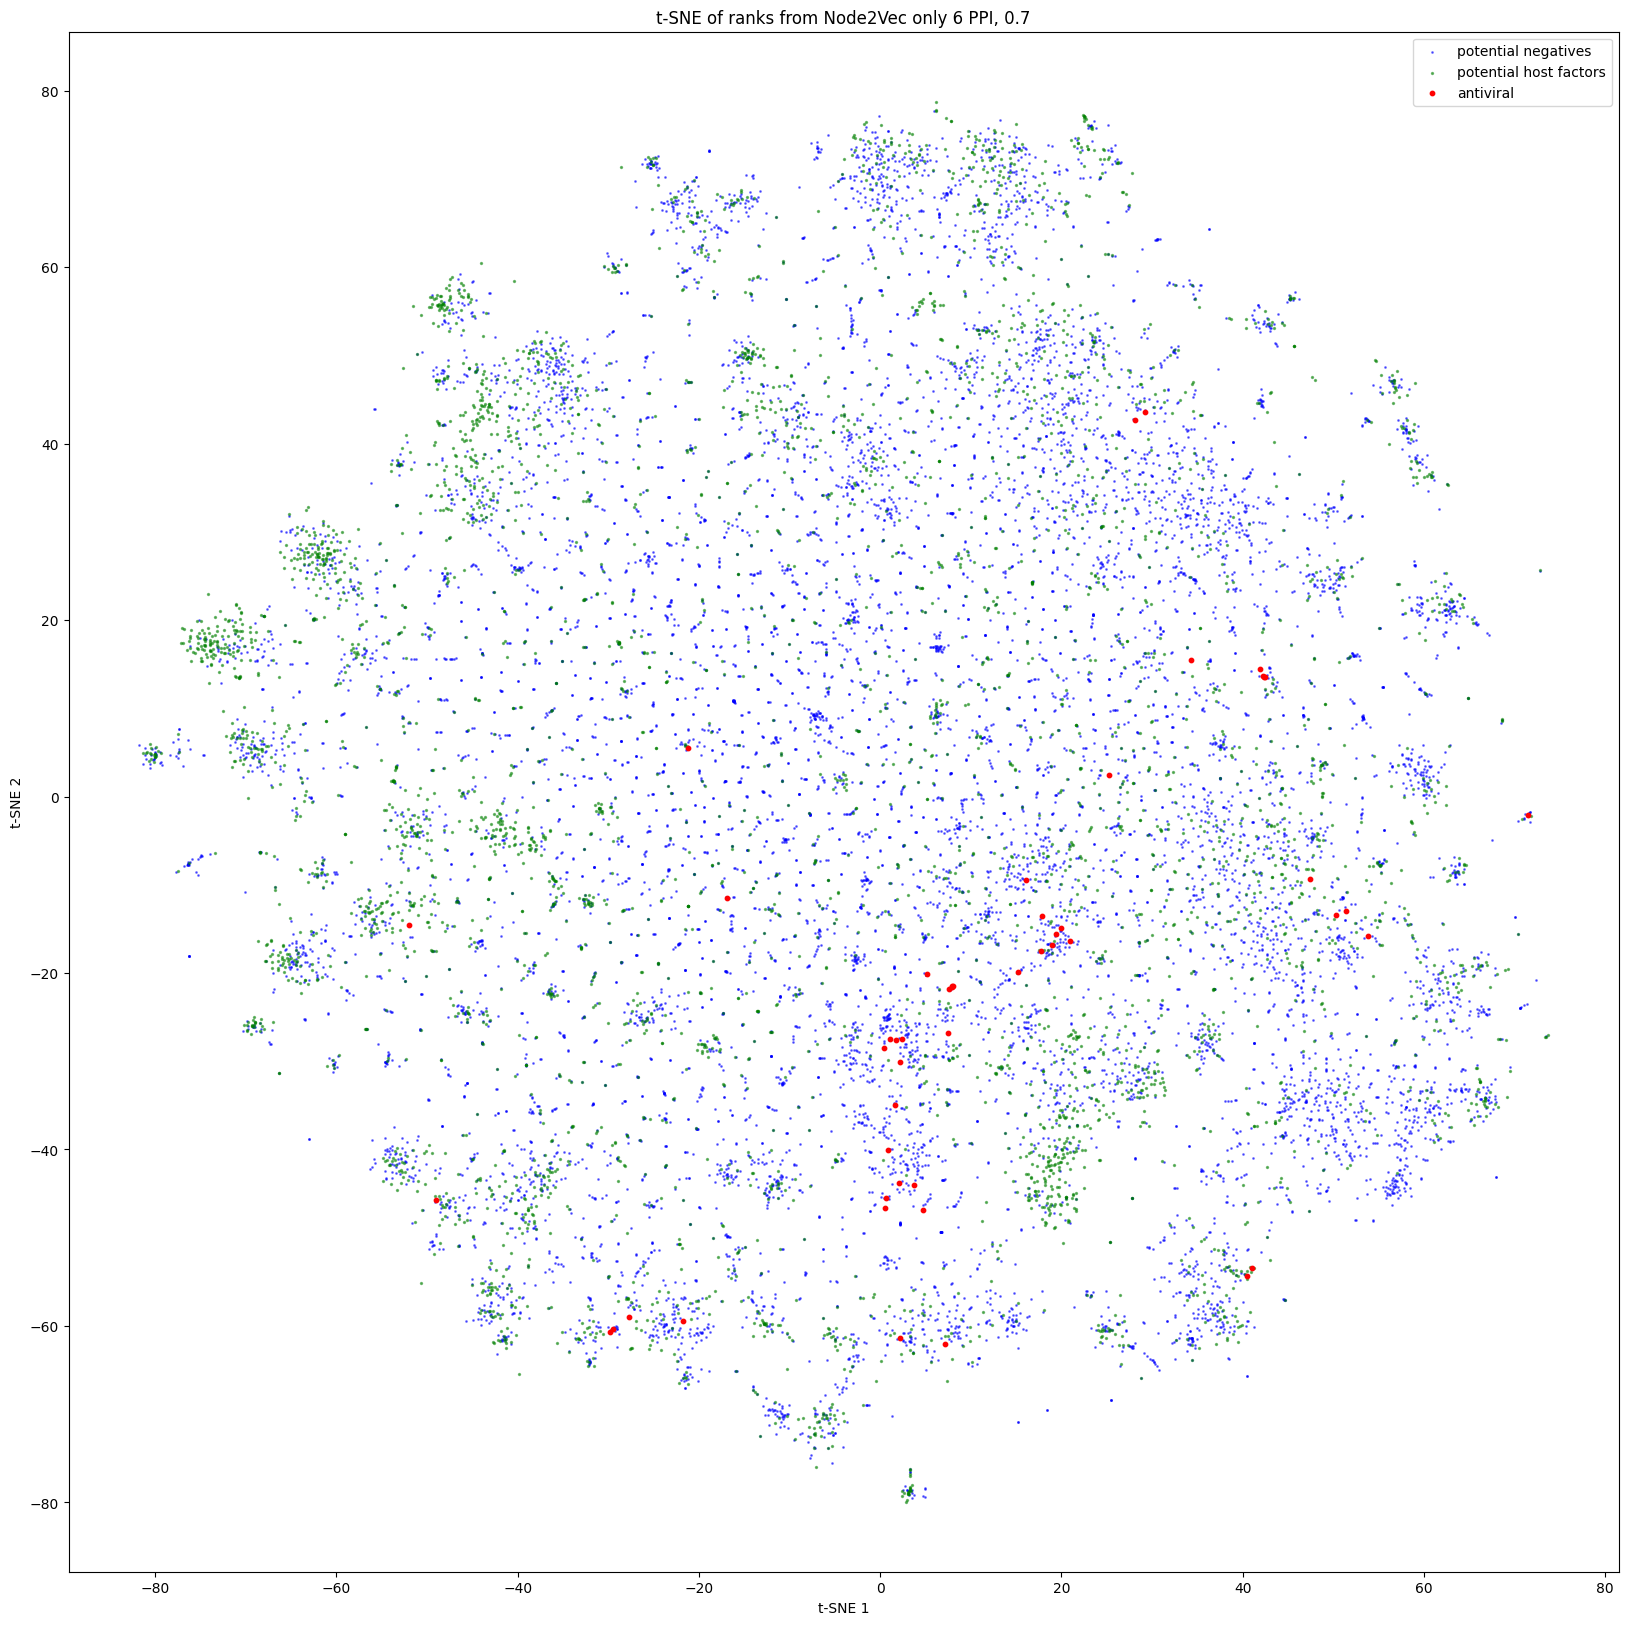

In [26]:
fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_6.embedding_[indices_of_potential_not_host_factors, 0], tsne_6.embedding_[indices_of_potential_not_host_factors, 1], c = "blue", label = "potential negatives", alpha = 0.5, s = 1)
plt.scatter(tsne_6.embedding_[indices_of_potential_host_factors, 0], tsne_6.embedding_[indices_of_potential_host_factors, 1], c = "green", label = "potential host factors", alpha=0.5, s = 2)
plt.scatter(tsne_6.embedding_[indices_of_antiviral, 0], tsne_6.embedding_[indices_of_antiviral, 1], c = "red", label = "antiviral", alpha=0.99, s = 10)
plt.legend()
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of ranks from Node2Vec only 6 PPI, 0.7")

In [14]:
ranks[:,0].size()

torch.Size([16285, 32])

### Let's use all the subnetworks of STRING from Node2Vec embedding

In [20]:
ranks_
for index in np.arange(1, 8):
    print(ranks[:,index].size())

torch.Size([16285, 32])
torch.Size([16285, 32])
torch.Size([16285, 32])
torch.Size([16285, 32])
torch.Size([16285, 32])
torch.Size([16285, 32])
torch.Size([16285, 32])


In [21]:
ranks.size()

torch.Size([16285, 8, 32])

In [43]:
# flatten torch.Size([16285, 8, 32]) tensor ranks in 2 dimension with size torch.Size([16285, 256])
ranks_flatten = ranks.reshape(ranks.size()[0], -1)

In [28]:
from sklearn.manifold import TSNE
tsne_total = TSNE(n_components=2, perplexity=50)
tsne_total.fit(ranks_flatten.numpy())

TSNE(perplexity=50)

Text(0.5, 1.0, 't-SNE of ranks from Node2Vec using all PPIs, 0.7')

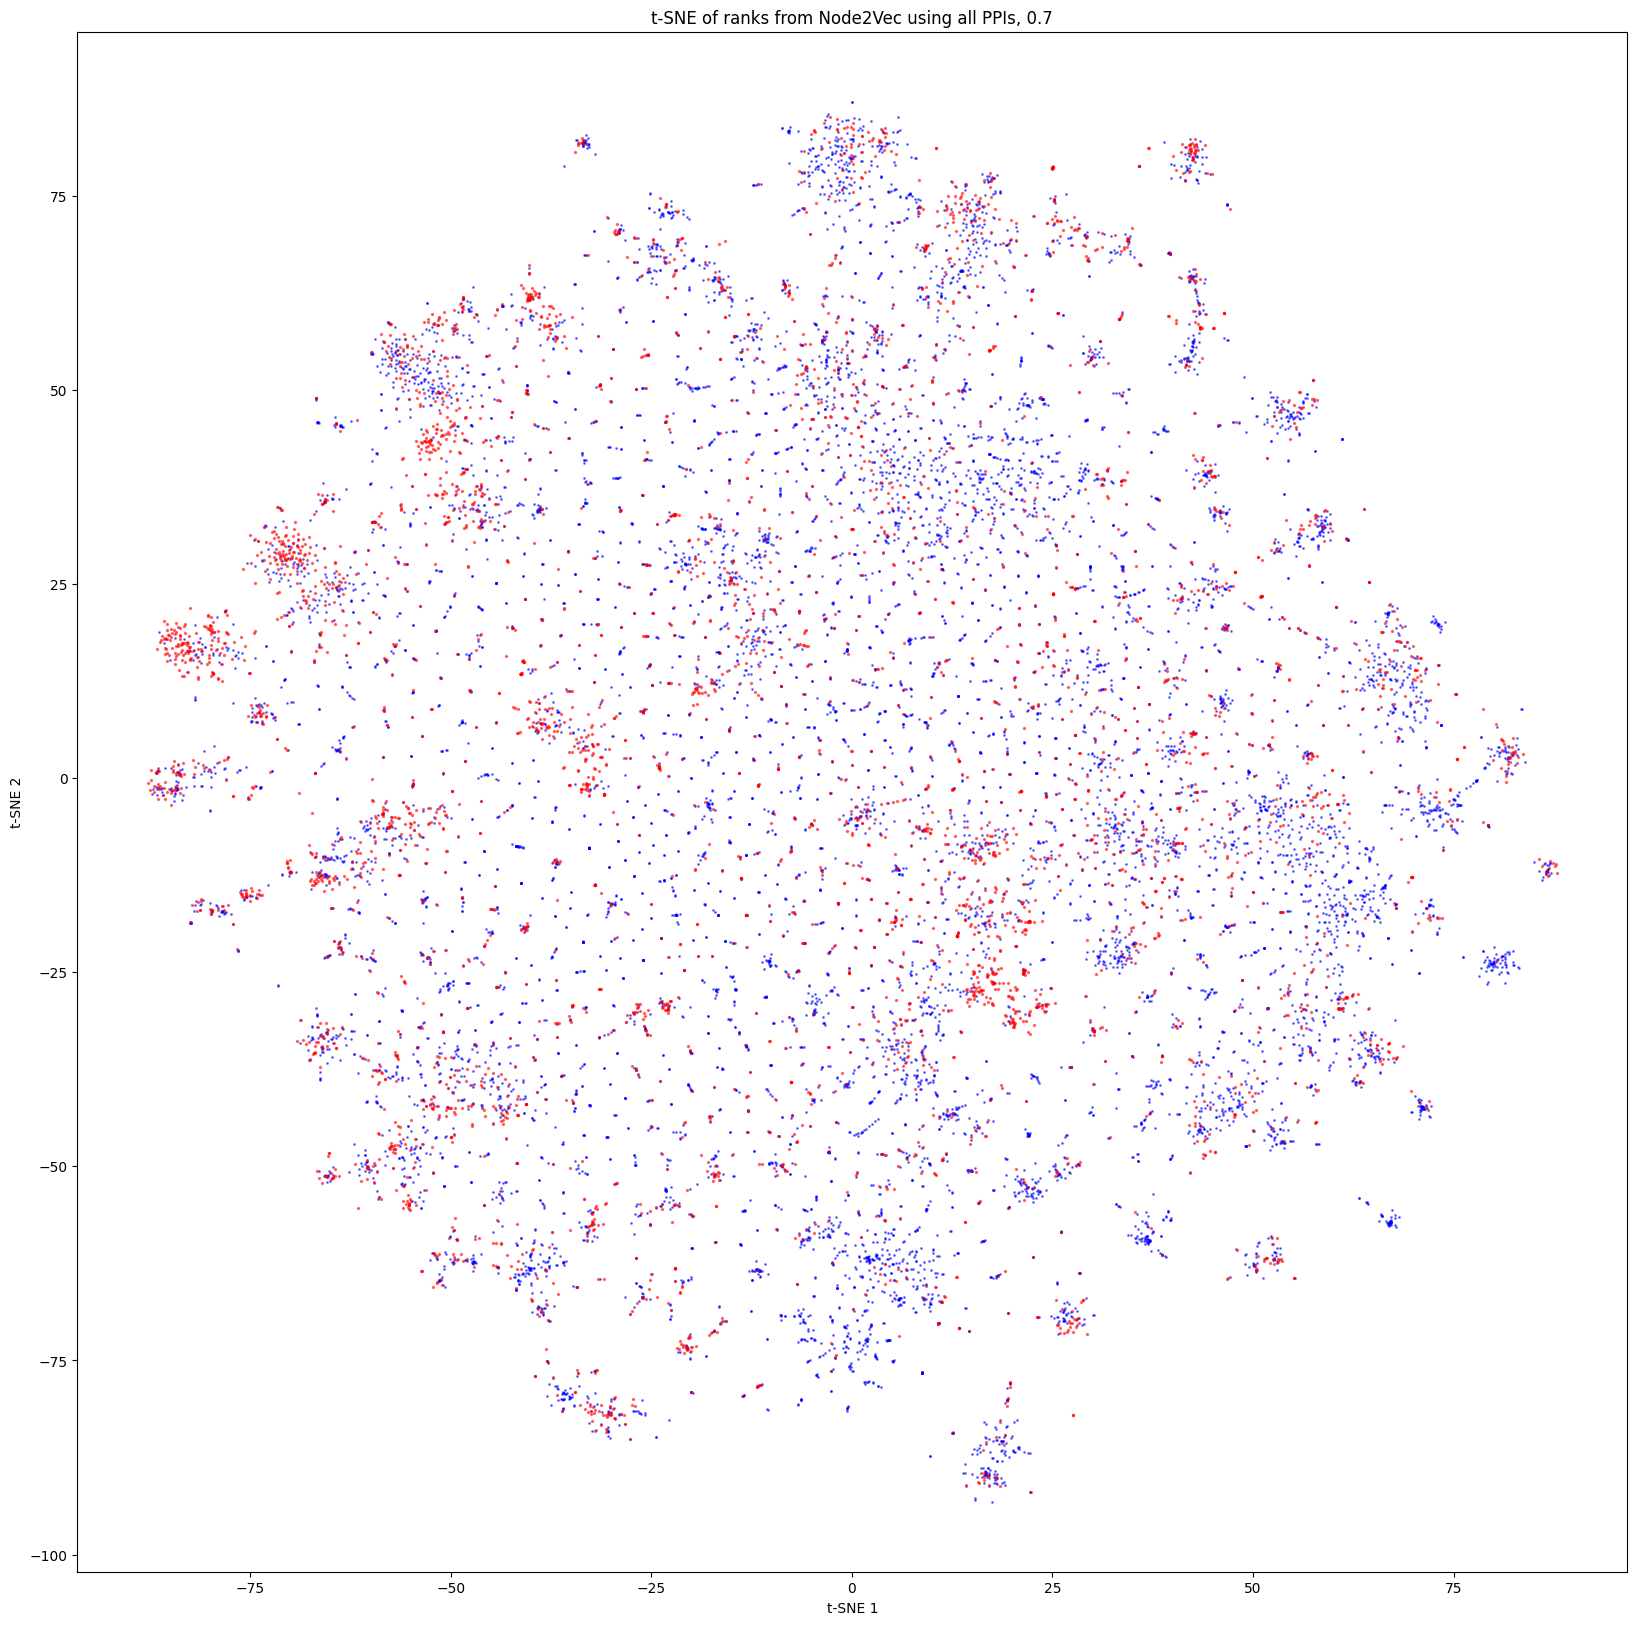

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_total.embedding_[indices_of_potential_not_host_factors, 0], tsne_total.embedding_[indices_of_potential_not_host_factors, 1], c = "blue", label = "potential negatives", alpha = 0.5, s = 1)
plt.scatter(tsne_total.embedding_[indices_of_potential_host_factors, 0], tsne_total.embedding_[indices_of_potential_host_factors, 1], c = "red", label = "potential host factors", alpha=0.5, s = 2)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE of ranks from Node2Vec using all PPIs, 0.7")

In [61]:
row, col = 0, 0
print(ranks_flatten[row][col])
print(ranks_flatten[row][col + 32])
print(ranks_flatten[row][col + 64])
print(ranks_flatten[row][col + 96])
print(ranks_flatten[row][col + 128])
print(ranks_flatten[row][col + 160])
print(ranks_flatten[row][col + 192])
print(ranks_flatten[row][col + 224])

tensor(0.3087)
tensor(-0.8075)
tensor(0.5102)
tensor(0.0511)
tensor(0.6950)
tensor(0.4437)
tensor(0.2577)
tensor(-0.0234)


In [67]:
# save ranks_flatten to file
torch.save(ranks_flatten, global_variables.home_folder + 'GhostFreePro/data_preprocessing_pipeline/artivir_data/positional_encoding/ranks_flatten_node2vec.pt')